In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf

from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

# From time stamps
from datetime import datetime 

# The tech stocks we'll use for this analysis
tech_list = ["AAPL", "GOOG", "MSFT", "AMZN"]

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download the data using yfinance directly
for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end)

# Create a list of the downloaded data
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Add company names and concatenate into a single dataframe
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

# Display the last 10 rows of the dataframe
df


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-09-25,174.199997,176.970001,174.149994,176.080002,175.183578,46172700,APPLE
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.084564,64588900,APPLE
2023-09-27,172.619995,173.039993,169.050003,170.429993,169.562332,66921800,APPLE
2023-09-28,169.339996,172.029999,167.619995,170.690002,169.821030,56294400,APPLE
2023-09-29,172.020004,173.070007,170.339996,171.210007,170.338364,51814200,APPLE
...,...,...,...,...,...,...,...
2024-09-18,186.449997,188.800003,185.059998,186.429993,186.429993,34448100,AMAZON
2024-09-19,190.039993,190.990005,188.470001,189.869995,189.869995,39543200,AMAZON
2024-09-20,190.229996,191.839996,187.410004,191.600006,191.600006,100378600,AMAZON


In [68]:
# Sumary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,193.114782,194.913294,191.469127,193.296230,192.831618,5.971174e+07
std,19.738115,19.978341,19.294049,19.653056,19.840438,2.959959e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,2.404830e+07
25%,175.959995,177.952503,175.017498,177.024994,176.212849,4.500432e+07
50%,189.449997,190.614998,188.019997,189.419998,188.703926,5.300555e+07
75%,212.092499,214.937500,209.212505,212.635006,212.389172,6.547662e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,3.186799e+08


In [69]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-09-25 to 2024-09-24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


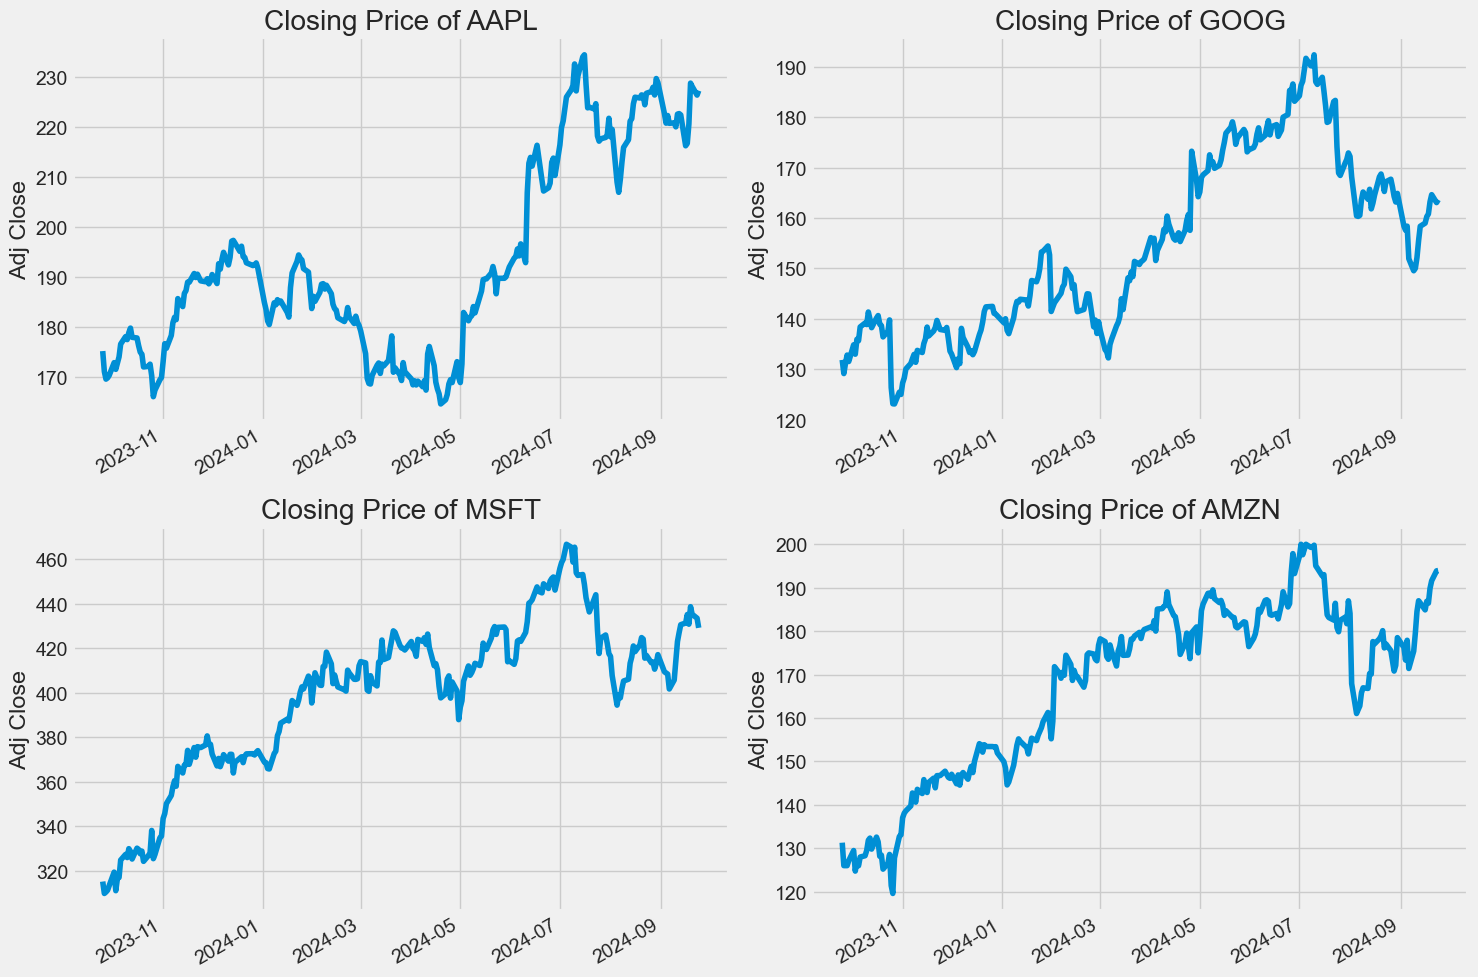

In [70]:
# Let's see a historical view of the closing price
plt.figure(figsize = (15,10))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

for i, company in enumerate (company_list, 1):
    plt.subplot(2, 2, i)
    company["Adj Close"].plot()
    plt.ylabel("Adj Close")
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()
plt.show()

Volume of Sales

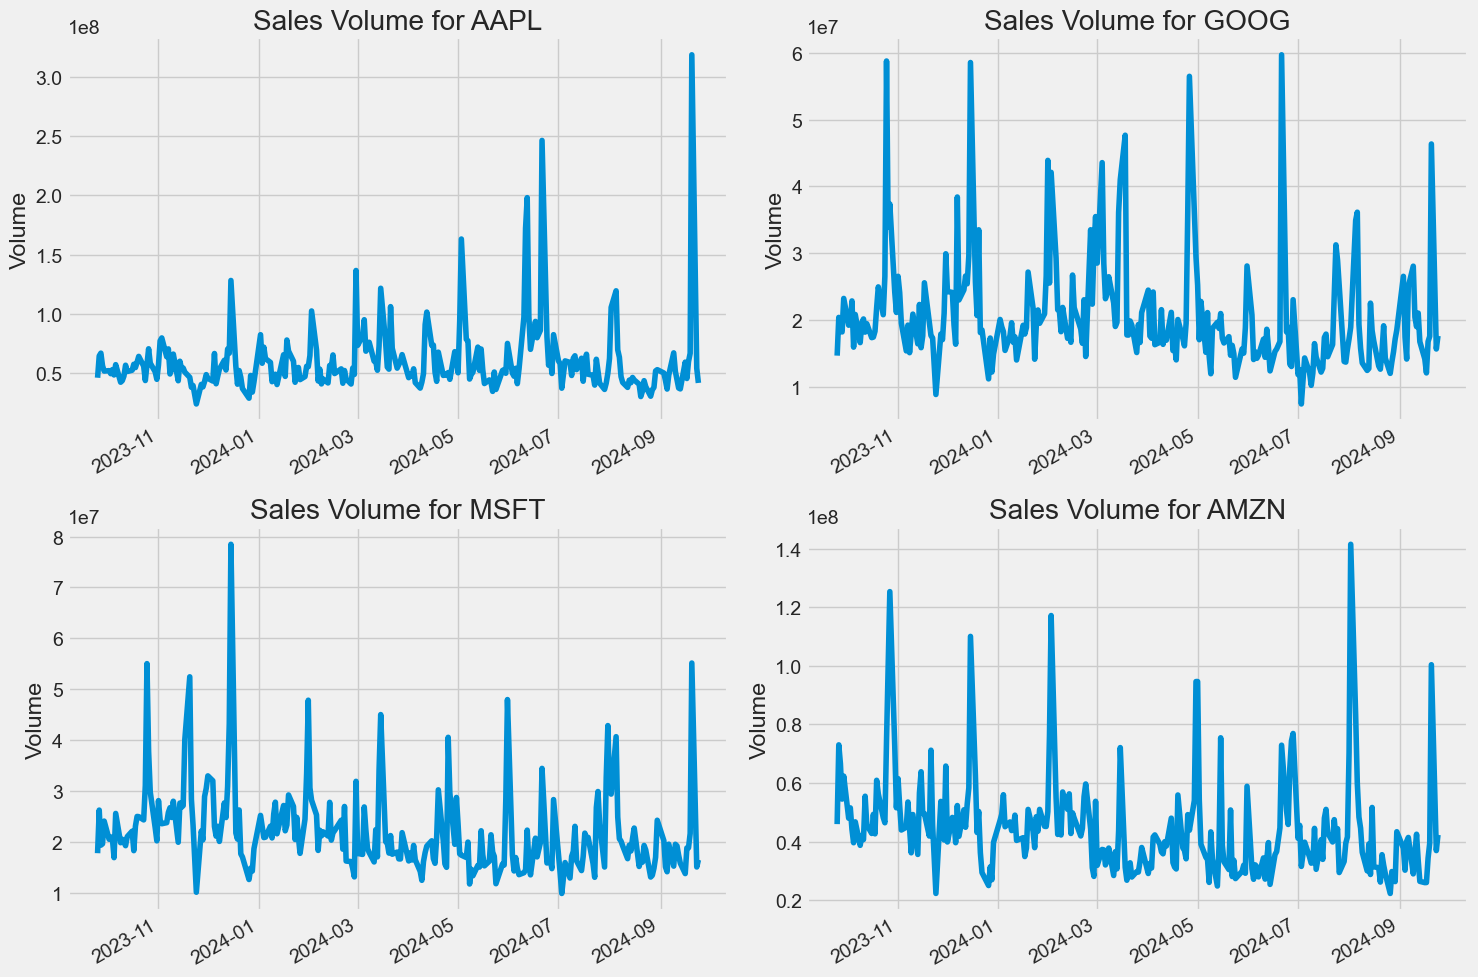

In [71]:
# Let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company["Volume"].plot()
    plt.ylabel("Volume")
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()
plt.show()

What was the Moving Average of the verious Stock

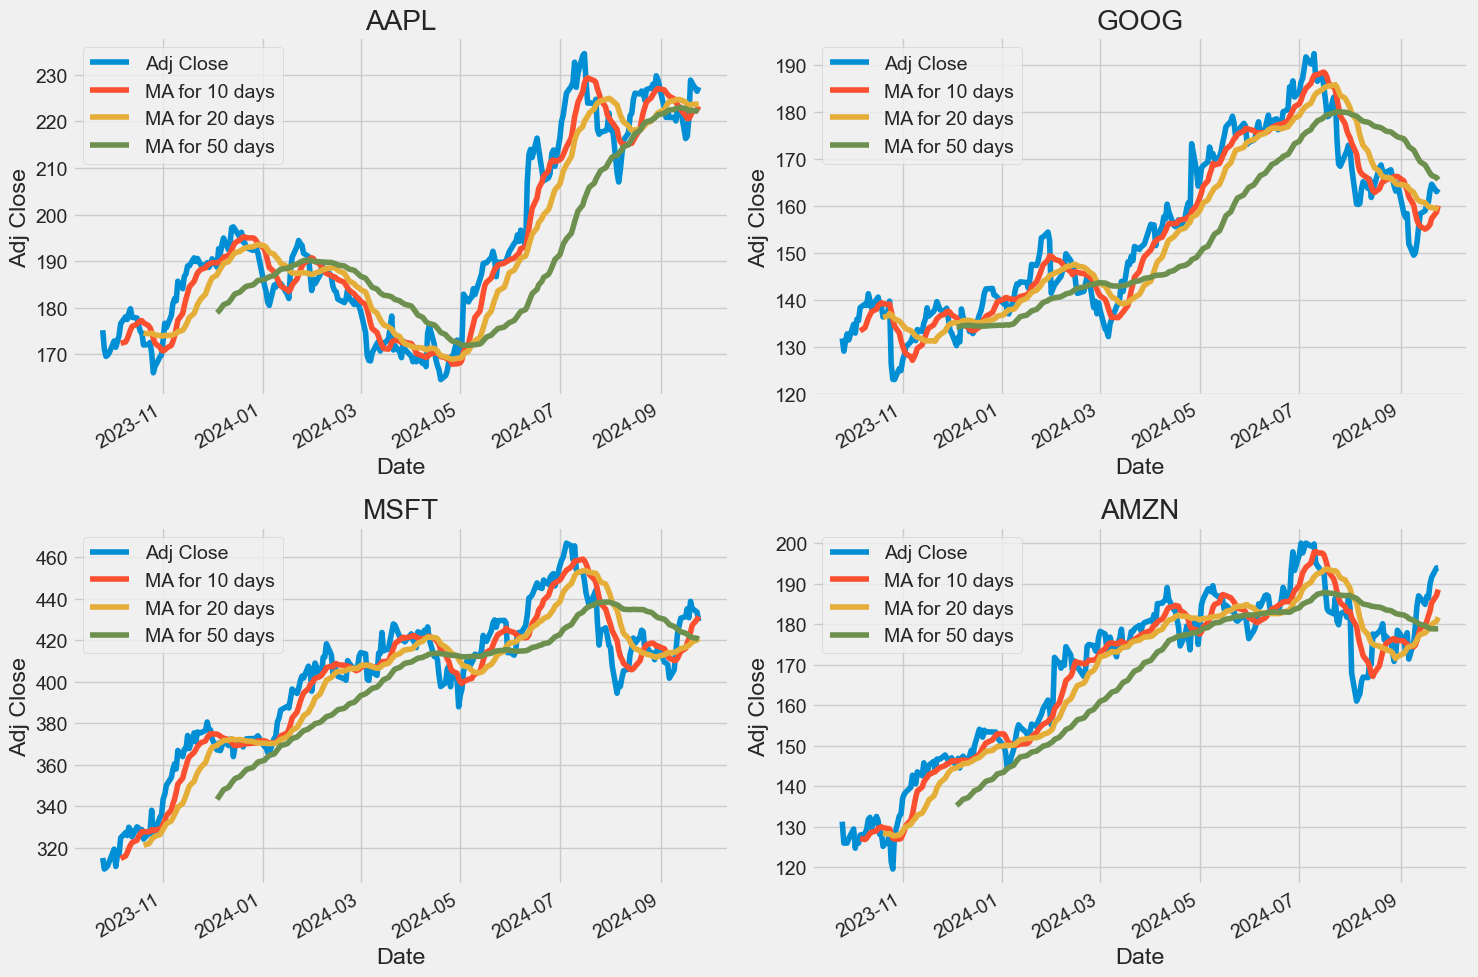

In [72]:
ma_day = [10, 20, 50]

# Calculate moving averages
for ma in ma_day:
    for company in company_list:  # Corrected typo here
        column_name = f"MA for {ma} days"
        company[column_name] = company["Adj Close"].rolling(ma).mean()

# Plotting the data
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    # Plot the adjusted close price along with the moving averages
    company[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=plt.gca())
    plt.ylabel("Adj Close")
    plt.title(f"{tech_list[i - 1]}")

plt.tight_layout()
plt.show()


What was the Daily Return of the Stock on Average?

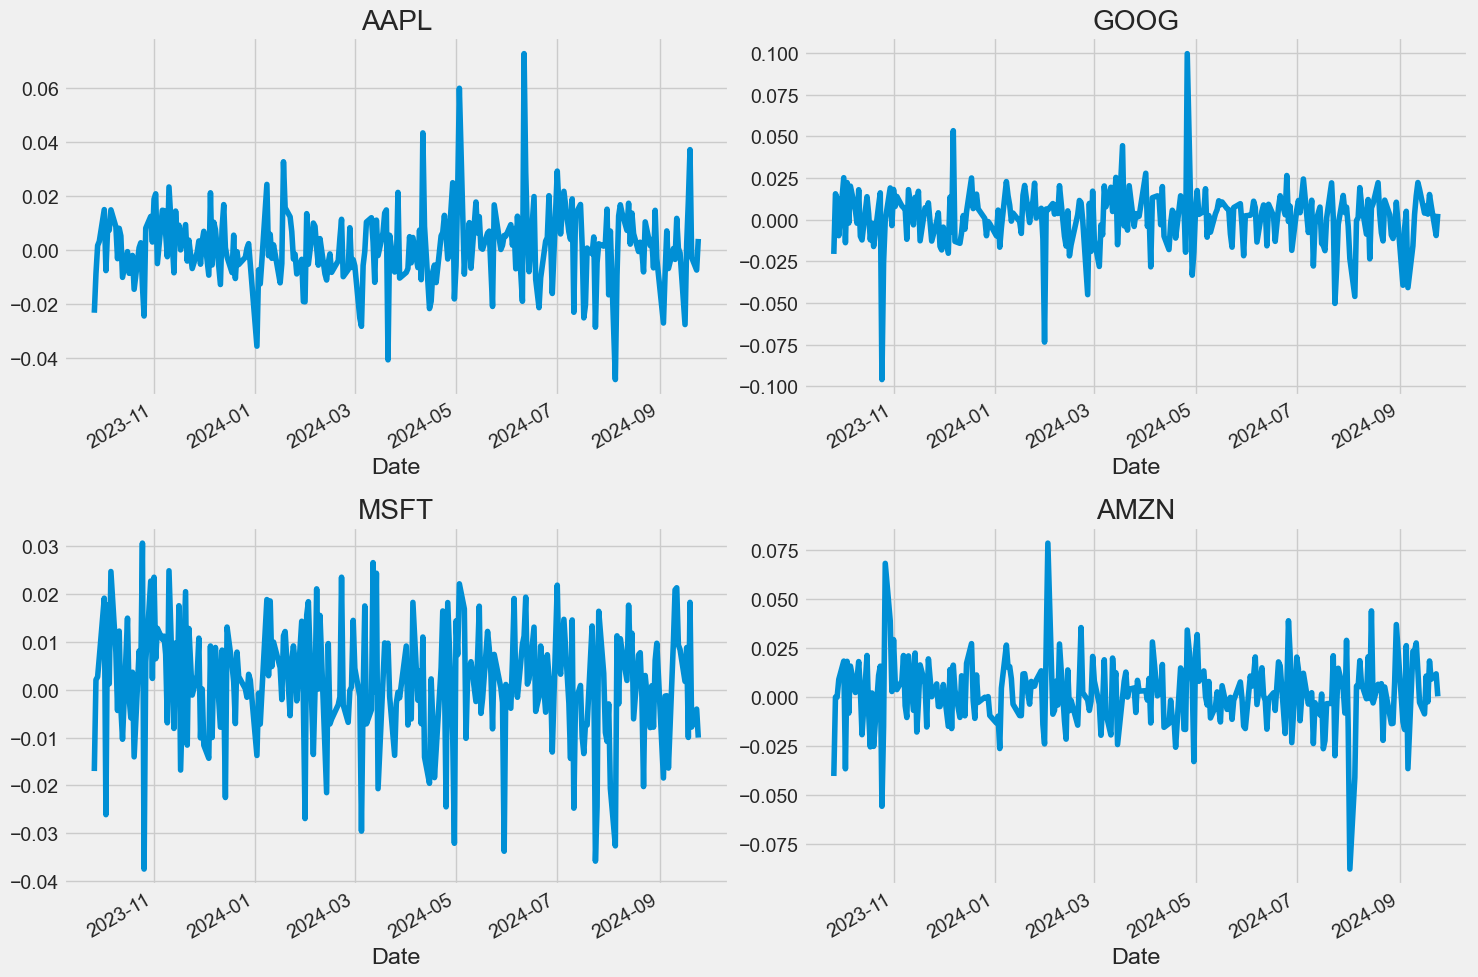

In [73]:
# We will use pct_change to find the percent change for each day
for company in company_list:
    company["Daily Returns"] = company["Adj Close"].pct_change()

# Then we will plot the daily return percentage
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company["Daily Returns"].plot()
    plt.title(f"{tech_list[i - 1]}")

plt.tight_layout()
plt.show()

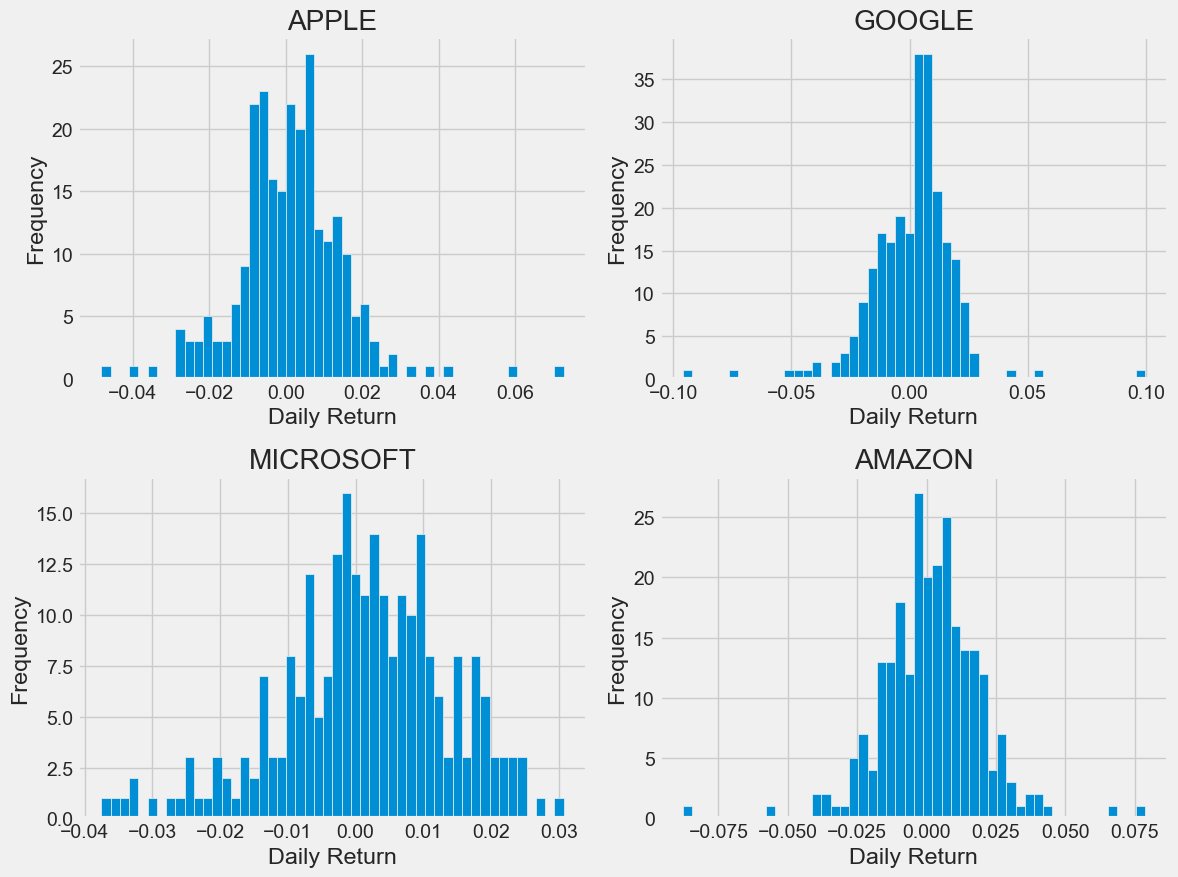

In [74]:
plt.figure(figsize=(12,9))

for i, company in enumerate(company_list, 1) :
    plt.subplot(2, 2, i)
    company["Daily Returns"].hist(bins = 50)
    plt.xlabel("Daily Return")
    plt.ylabel("Frequency")
    plt.title(f"{company_name[i - 1]}")

plt.tight_layout()
plt.show() 

What was the Correlation between different stocks closing prices?

In [75]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = yf.download(tech_list, start = start, end = end)["Adj Close"] # using yfinance to download the data

#make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-09-25 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-09-26 00:00:00+00:00,-0.023398,-0.040299,-0.020580,-0.017006
2023-09-27 00:00:00+00:00,-0.008898,0.000000,0.015527,0.002082
2023-09-28 00:00:00+00:00,0.001526,0.000000,0.012703,0.002718
2023-09-29 00:00:00+00:00,0.003047,0.009049,-0.009615,0.006727


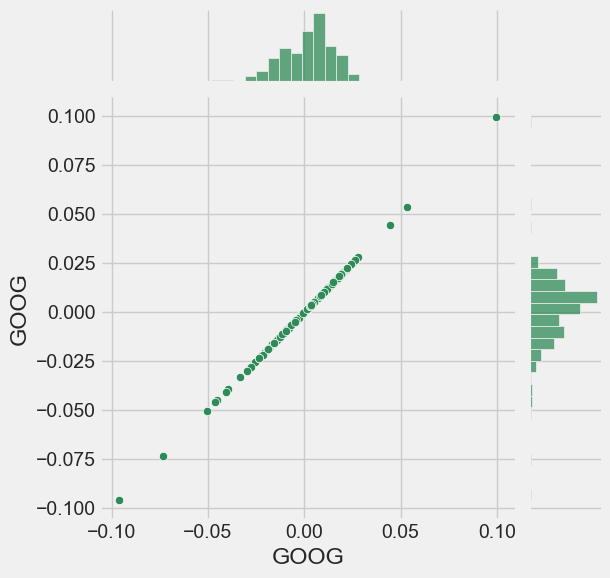

In [76]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x="GOOG", y="GOOG", data=tech_rets, kind="scatter", color="seagreen")


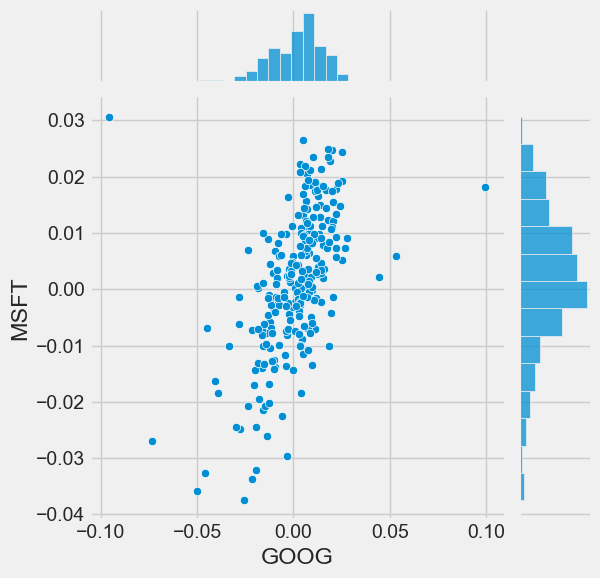

In [77]:
# We'll use jointplot to compare the daily returns of Google and Microsoft
sns.jointplot(x="GOOG", y="MSFT", data=tech_rets, kind="scatter")


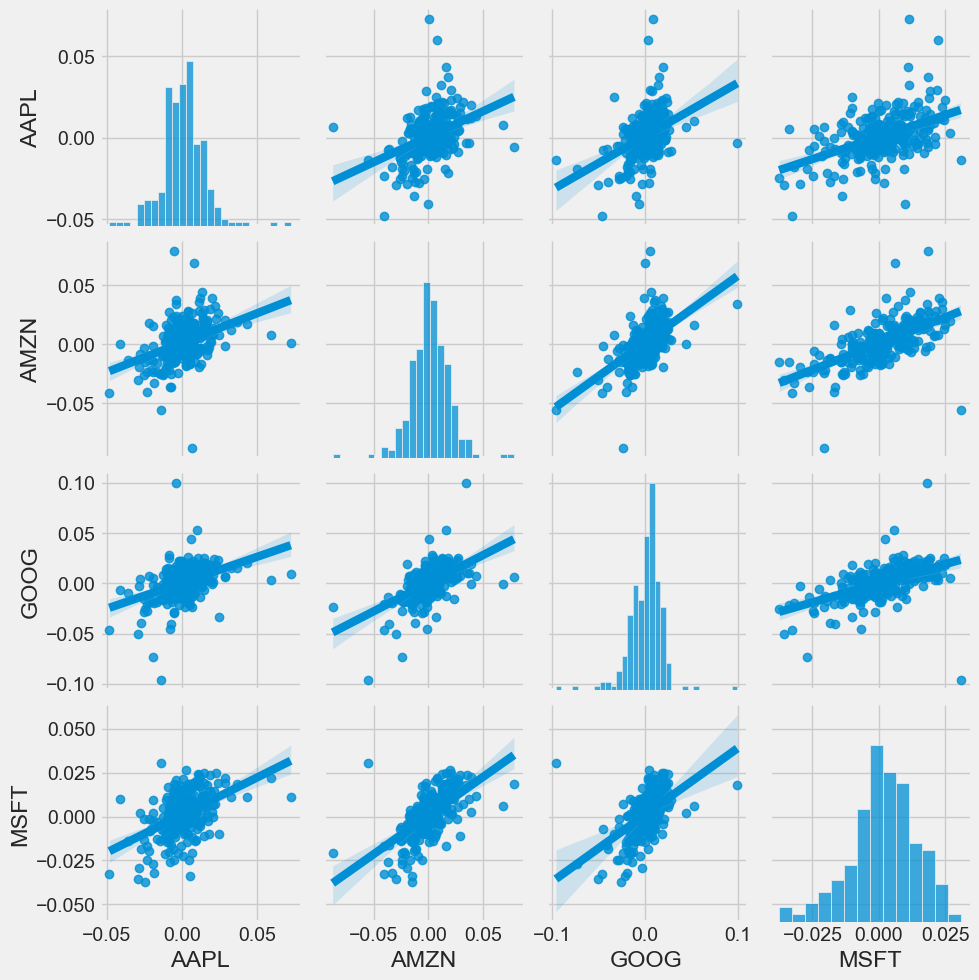

In [78]:
# we can simply call pairplot on our DataFramer for an automatic visul analysis of all the comparisons
sns.pairplot(tech_rets, kind="reg")

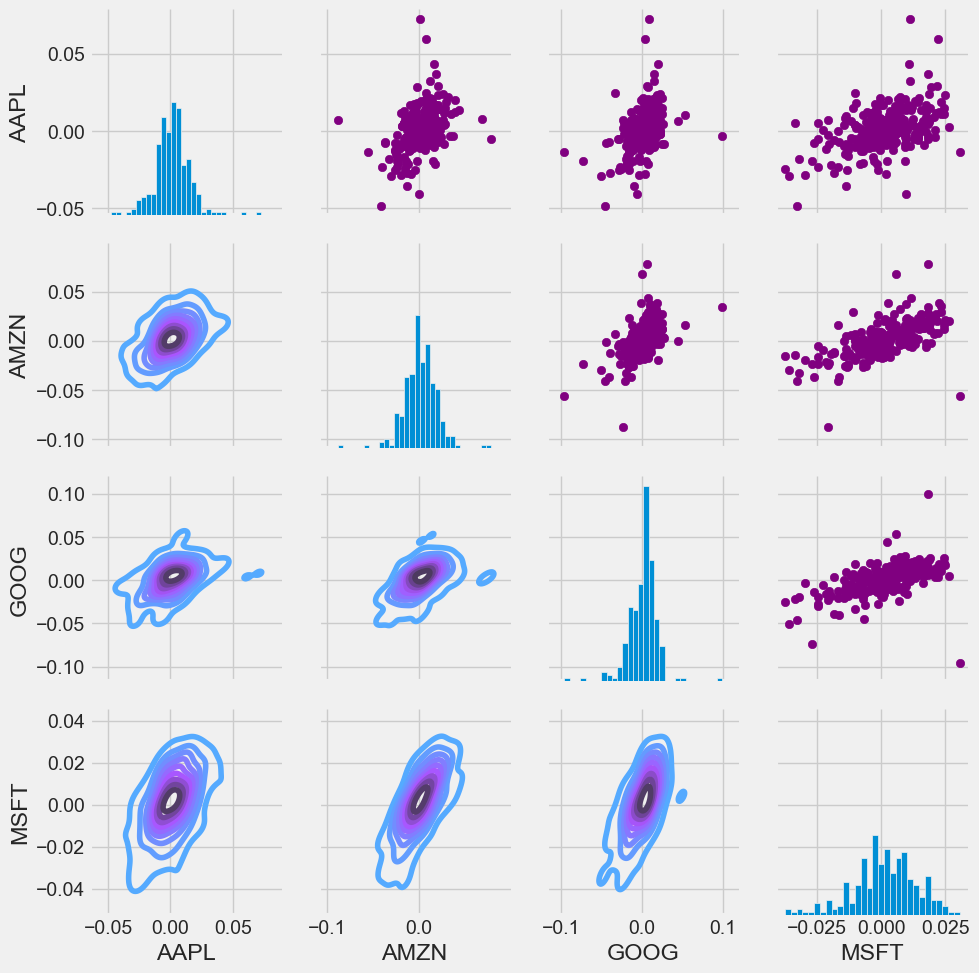

In [79]:
# Set up our figure by naming it returns_fig, call PairPlot on the data frame 
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_Upper we can specify what upper tringle will look like 
return_fig.map_upper(plt.scatter, color="purple")

#we can also define the lower triangle in the figur, including the plot type (kde) or the color (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap="cool_d") # kdeplot is a Kernel Density Estimation plot

# Finally we will define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

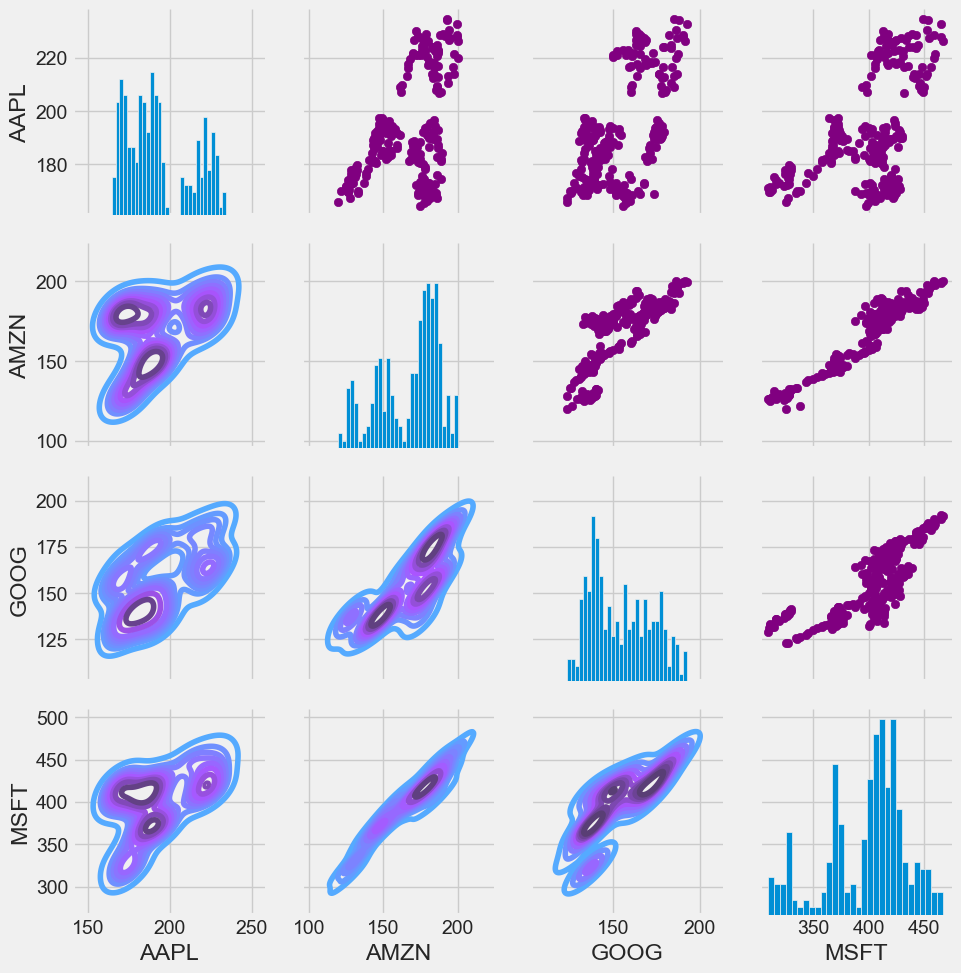

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming closing_df is already defined

# Setup our figure by naming it returns_fig, call PairGrid on the DataFrame 
return_fig = sns.PairGrid(closing_df)

# Using map_upper, we can specify what the upper triangle will look like
return_fig.map_upper(plt.scatter, color="purple")

# We can also define the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap="cool_d")  # Corrected 'camp' to 'cmap'

# Finally, we will define the diagonal as a series of histogram plots of the daily return 
return_fig.map_diag(plt.hist, bins=30)

# Show the plot
plt.show()


Text(0.5, 1.0, 'correlation of stock price')

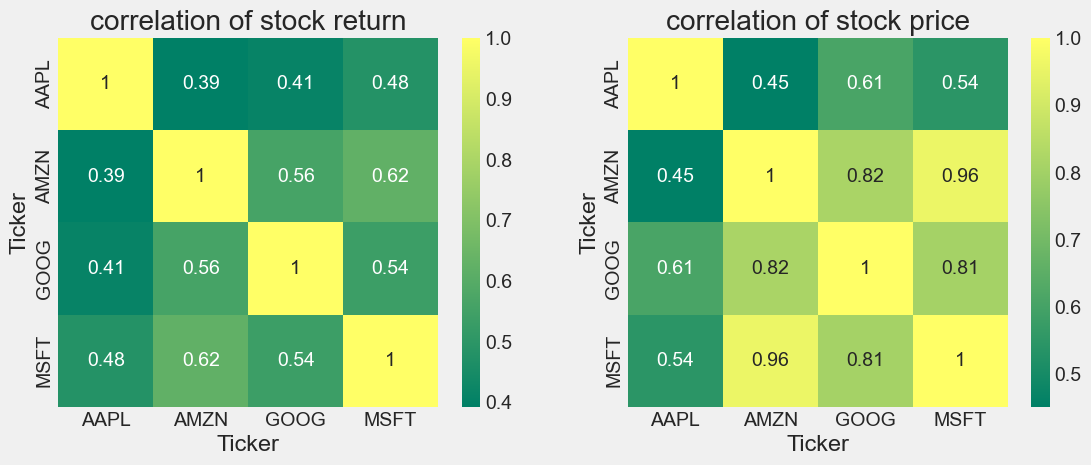

In [81]:
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True, cmap="summer") # annot = True will add the correlation values on the plot
plt.title("correlation of stock return")

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot=True, cmap="summer")
plt.title("correlation of stock price")

How much value do we put at risk by investing in a particular stock?

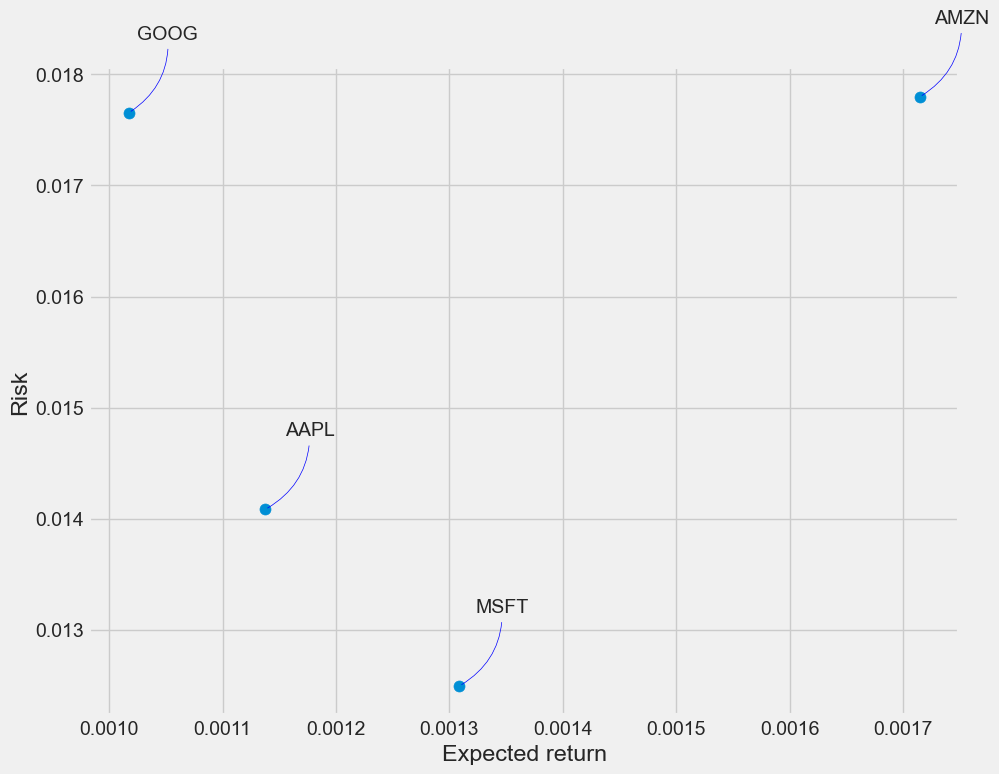

In [82]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected return")  # Corrected function name
plt.ylabel("Risk")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):  # Corrected 'column' to 'columns'
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords="offset points", 
                 ha="right", va="bottom", arrowprops=dict(arrowstyle="-", color="blue", connectionstyle="arc3,rad=-0.3"))

plt.show()


predicting the closing price stock price of APPLE inc:

In [83]:
import yfinance as yf
from datetime import datetime

# Get the stock quote for Apple
df = yf.download("AAPL", start="2012-01-01", end=datetime.now())
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402626,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469280,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607711,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739511,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719305,394024400
...,...,...,...,...,...,...
2024-09-18,217.550003,222.710007,217.539993,220.690002,220.690002,59894900
2024-09-19,224.990005,229.820007,224.630005,228.869995,228.869995,66781300
2024-09-20,229.970001,233.089996,227.619995,228.199997,228.199997,318679900


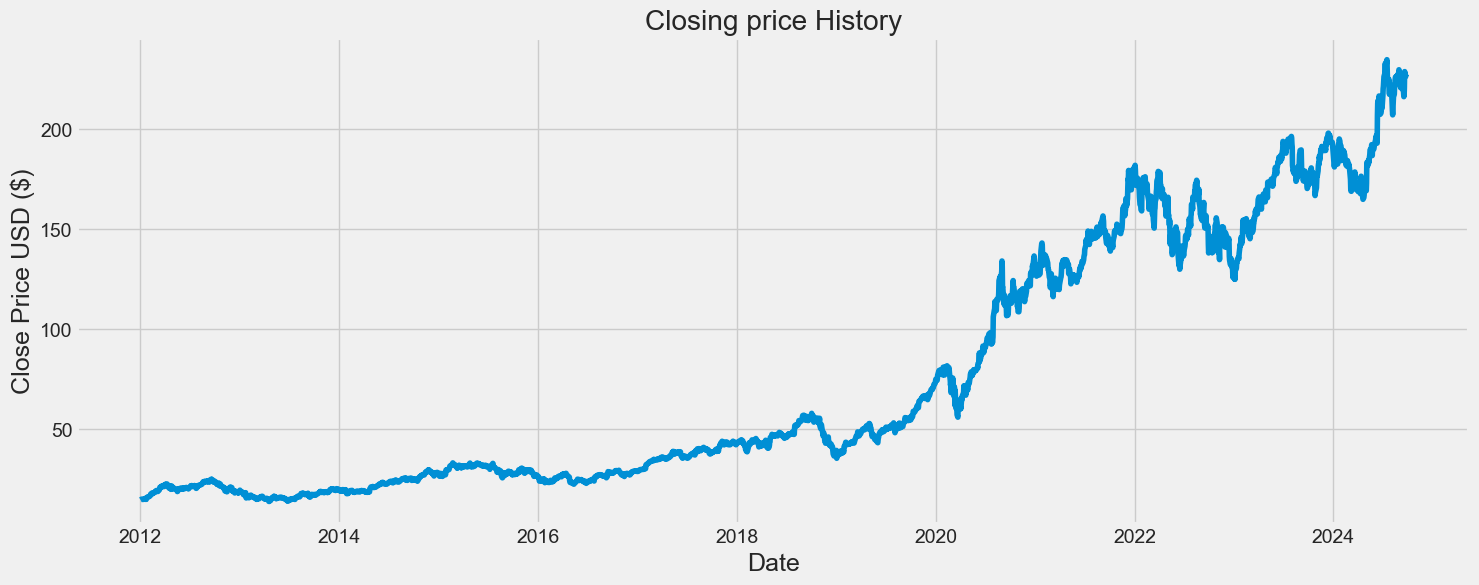

In [84]:
plt.figure(figsize = (16,6))
plt.title("Closing price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price USD ($)", fontsize = 18)
plt.show()

In [85]:
# Create a new dataframe with only the Close column
data = df.filter(["Close"])

#convert the dataframe to s numpy array 
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * 0.95))
training_data_len

3042

In [86]:
# Scale the data 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00334711],
       [0.00370446],
       [0.00444665],
       ...,
       [0.97002791],
       [0.96219536],
       [0.96627008]])

In [87]:
# Create the Training data set 
#Create the scaled tarining dataset
train_data = scaled_data[0:int(training_data_len), :]

#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)  # Use = instead of -

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Check the shape of x_train
x_train.shape


[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.0048137 , 0.00596336, 0.00483149,
       0.00907602, 0.00874778, 0.00917627, 0.01010279, 0.01066387,
       0.01061698, 0.01044397, 0.0111813 , 0.01187498, 0.01266083,
       0.01393014, 0.01659652, 0.01663694, 0.01812132, 0.01923055,
       0.01732415, 0.01805825, 0.0180437 , 0.0201021 , 0.01980942,
       0.0203511 , 0.02132451, 0.0218662 , 0.02342657, 0.02456329,
       0.02489154, 0.02500635, 0.02306276, 0.02259383, 0.02266337,
       0.02449054, 0.02500473, 0.02610912, 0.02871243, 0.03218567,
       0.03153564, 0.03153726, 0.03404841, 0.03483426, 0.03427478,
       0.03376382, 0.03323184, 0.03499918, 0.03621191, 0.03671963])]
[0.03546486572351548]

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.00

(2982, 60, 1)

In [88]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))  # Use Input layer for the input shape
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


2982/2982 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0017


In [89]:
# Create the testing data set 
# Create a new array containing scaled values from index 1543 to 2002

test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


7.390786388315906

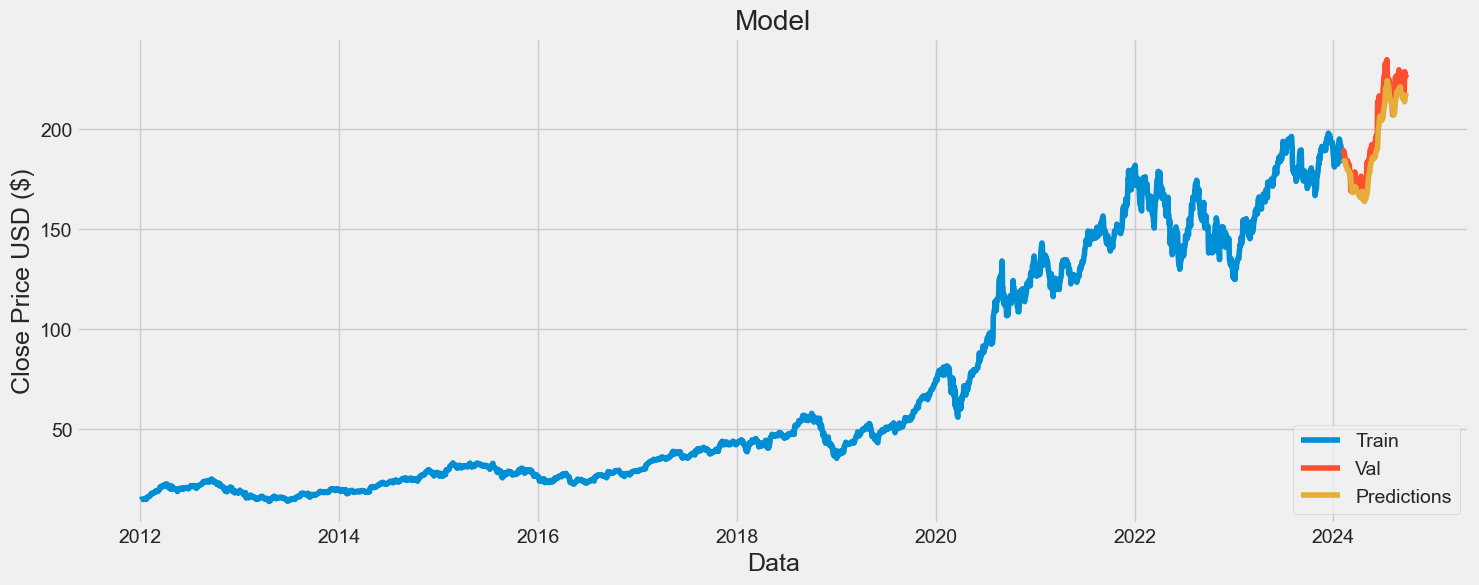

In [90]:
# Split the data
train = data[:training_data_len]
valid = data[training_data_len:].copy()  # Create a copy to avoid the warning

# Assuming 'predictions' is already generated and is a numpy array or a list
valid.loc[:, "Predictions"] = predictions  # This should now work without a warning

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Data", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"], label="Train")
plt.plot(valid["Close"], label="Val")
plt.plot(valid["Predictions"], label="Predictions")  # Use the correct column name here
plt.legend(loc="lower right")
plt.show()


In [91]:
valid # Show the valid and predicted prices

,Close,Predictions
Date,,
2024-02-06,189.300003,183.263245
2024-02-07,189.410004,183.450409
2024-02-08,188.320007,183.868057
2024-02-09,188.850006,184.118958
2024-02-12,187.149994,184.354111
...,...,...
2024-09-18,220.690002,214.036392
2024-09-19,228.869995,213.794525
2024-09-20,228.199997,215.303909
